<a href="https://colab.research.google.com/github/Raphaele74/Raphaele74/blob/main/Copie_de_01_MNIST_Classification_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

Tensorflow est une serie de bibliotheques de code et de collaboration

In [5]:
import tensorflow as tf
print(f'Tensorflow version {tf.__version__}')

Tensorflow version 2.4.1


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

numpy allows to use large mathematical arrays and matrix functions in python 
pandas: same thing: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.	
github.com/numpy/numpy
https://pandas.pydata.org/
seaborn Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 
https://seaborn.pydata.org
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines
matplotlib.pyplot servira à faire des graphiques composés de plusieurs plots
https://scikit-learn.org/stable/
The sklearn.metrics module includes score functions, performance metrics and pairwise metrics and distance computations.

## Data

In [7]:
# Downloading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


cree par MIT, gere par principalement des GOOGLE: https://keras.io/governance/


Pour trouver des data sets, aller à https://keras.io/api/datasets/
License: Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset, which is a derivative work from original NIST datasets. MNIST dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license. Tout savoir sur le MNIST data set: http://yann.lecun.com/exdb/mnist/
En particulier, les images sont normalisées et centrées

#### Data Types and Format

First step of a Machine Learning project is to dive into the data and get a sense of the task you're trying to solve.

In [ ]:
# TODO: check out the shape, the type and the range of the data

In [8]:
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(np.min(x_train), np.max(x_train))

(60000, 28, 28)
(10000, 28, 28)
uint8
0 255


<details>
<summary markdown='span'>View solution
</summary>

```python
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(np.min(x_train), np.max(x_train))
```

In [ ]:
# TODO: check output format and the number of classes (set the variables num_outputs)

In [9]:
print(y_train.shape)
classes_values = np.unique(y_train)
num_outputs = len(classes_values)
print(num_outputs)

(60000,)
10


<details>
<summary markdown='span'>View solution
</summary>

```python
print(y_train.shape)
classes_values = np.unique(y_train)
num_outputs = len(classes_values)
print(num_outputs)
```

#### Displaying the data

In [ ]:
# TODO: Display a given image along with its class
# hint: make use of the matplotlib.pyplot library already imported as plt

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

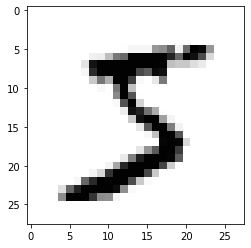

In [10]:
ind = 0
plt.imshow(x_train[ind], cmap='Greys')
plt.title('')
plt.show()

<details>
<summary markdown='span'>View solution
</summary>

```python
ind = 0
plt.imshow(x_train[ind], cmap='Greys')
plt.title('')
plt.show()
```

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html c'est la doc des fonctions de plot


In [ ]:
# TODO: display an image of each class in a grid


1
3
5
7
2
0
13
15
17
4


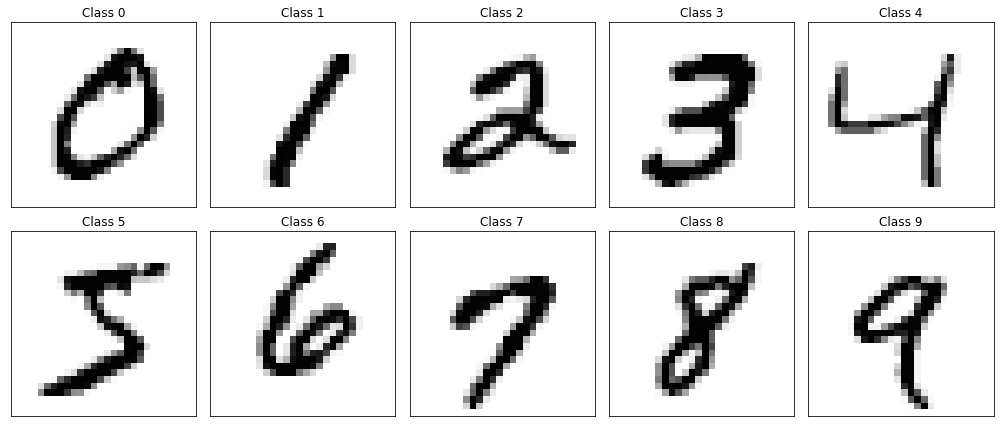

10

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
 
for ax, i in zip(axs.flat, range(num_outputs)):
    # Find an image of class i
    img_index = np.arange(len(y_train))[y_train == i][0]
    print (img_index)
    
    ax.imshow(x_train[img_index], cmap='Greys')
    ax.set_title(f'Class {i}')
 
plt.tight_layout()
plt.show()
num_outputs

<details>
<summary markdown='span'>Hints
</summary>

In the pyplot library, you can create a figure which will contain a grid of small containers for plot. This is done with the following code
`fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 10))`
You can read more about it [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html) and see an example [here](see an example here: https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html#sphx-glr-gallery-images-contours-and-fields-interpolation-methods-py)

Then you just need to loop over the grid of axes (which is 2D if you ask for both several rows and columns)

</details>


<details>
<summary markdown='span'>View solution
</summary>

```python
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, i in zip(axs.flat, range(num_outputs)):
    # Find an image of class i
    img_index = np.arange(len(y_train))[y_train == i][0]
    ax.imshow(x_train[img_index], cmap='Greys')
    ax.set_title(f'Class {i}')

plt.tight_layout()
plt.show()

```

In [12]:
# TODO: check the class distribution in the train and test set
# a bar plot of the histogram of the number of samples for each class is
# a nice way of representing it 

In [14]:
fraction_per_class_in_train = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_train[i] = (y_train == i).sum()
fraction_per_class_in_train /= len(y_train)
print('Sample distribution in train')
print(fraction_per_class_in_train)
 
fraction_per_class_in_test = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_test[i] = (y_test == i).sum()
fraction_per_class_in_test /= len(y_test)
print('Sample distribution in test')
print(fraction_per_class_in_test)

Sample distribution in train
[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]
Sample distribution in test
[0.098  0.1135 0.1032 0.101  0.0982 0.0892 0.0958 0.1028 0.0974 0.1009]


np.zeros = Return a new array of given shape and type, filled with zeros.

ici num_outputs = len(classes_values) et vaut 10
y_train est égal à i
fraction_per_class_in_train est ensuite divisé par la longueur du set d'entrainement

<details>
<summary markdown='span'>View solution
</summary>

```python
fraction_per_class_in_train = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_train[i] = (y_train == i).sum()
fraction_per_class_in_train /= len(y_train)
print('Sample distribution in train')
print(fraction_per_class_in_train)

fraction_per_class_in_test = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_test[i] = (y_test == i).sum()
fraction_per_class_in_test /= len(y_test)
print('Sample distribution in test')
print(fraction_per_class_in_test)
```

#### Preparing the data

We need to prepare the data for our modeling part

In [ ]:
# TODO: Make the input continuous in the range [0, 1]

In [15]:
x_train_continuous = x_train / 255
x_test_continuous = x_test / 255

<details>
<summary markdown='span'>View solution
</summary>

```python
x_train_continuous = x_train / 255
x_test_continuous = x_test / 255
```

In [ ]:
# TODO: display again an image to make sure you converted it correctly

In [28]:
fraction_per_class_in_train = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_train[i] = (y_train_small == i).sum()
fraction_per_class_in_train /= len(y_train_small)
print(fraction_per_class_in_train)

[0.0953 0.1158 0.1022 0.0961 0.0977 0.0878 0.1017 0.1036 0.1009 0.0989]


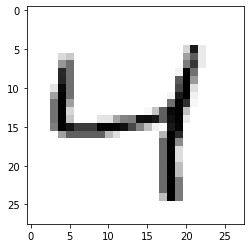

In [22]:
ind = 2
plt.imshow(x_train_continuous[ind], cmap='Greys')
plt.show()

<details>
<summary markdown='span'>View solution
</summary>

```python
ind = 0
plt.imshow(x_train_continuous[ind], cmap='Greys')
plt.show()
```

In [ ]:
# TODO: flatten the input so you can use it in a model, check the size at the end

In [17]:
x_train_flatten = x_train_continuous.reshape((len(x_train), -1))
x_test_flatten = x_test_continuous.reshape((len(x_test), -1))
print(x_train_flatten.shape)

(60000, 784)


<details>
<summary markdown='span'>View solution
</summary>

```python
x_train_flatten = x_train_continuous.reshape((len(x_train), -1))
x_test_flatten = x_test_continuous.reshape((len(x_test), -1))
print(x_train_flatten.shape)
```

In [25]:
# TODO: Reduce the size of your training data with a random sample of 10 000 images
# (check the numpy function np.random.randint)

# here we fix the seed of the random sampling so we all work with the same randomness
random_state = 42
np.random.seed(random_state)
index = np.random.randint(len(x_train_flatten), size=10000)

index: sous ensemble du training data set : on passe de 60000 images à 10000 images tirées au hasard.

In [26]:
index

array([56422, 15795,   860, ...,  9484,  5495, 28481])

In [33]:
idx_sample = np.random.randint(len(x_train_flatten), size=10000)
x_train_small = x_train_flatten[idx_sample]
y_train_small = y_train[idx_sample]

In [35]:
idx_sample

array([11267, 52361, 40166, ..., 59021, 36807, 34072])

<details>
<summary markdown='span'>View solution
</summary>

```python
idx_sample = np.random.randint(len(x_train_flatten), size=10000)
x_train_small = x_train_flatten[idx_sample]
y_train_small = y_train[idx_sample]
```

In [ ]:
# TODO: check class distribution in sample

In [29]:
fraction_per_class_in_train = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_train[i] = (y_train_small == i).sum()
fraction_per_class_in_train /= len(y_train_small)
print(fraction_per_class_in_train)

[0.0953 0.1158 0.1022 0.0961 0.0977 0.0878 0.1017 0.1036 0.1009 0.0989]


<details>
<summary markdown='span'>View solution
</summary>

```python
fraction_per_class_in_train = np.zeros(num_outputs)
for i in range(num_outputs):
  fraction_per_class_in_train[i] = (y_train_small == i).sum()
fraction_per_class_in_train /= len(y_train_small)
print(fraction_per_class_in_train)
```

## Linear Model

As a review of ML and to build a baseline we start with a simple multinomial logistic regression.

TODO: 

Model fitting: import the model from sklearn and fit it to your sample of data of the train set, print the accuracy on your training sample and on the test data.

Model Investigation: Check the confusion matrix and show a mis-labelled image per class

#### Modeling

In [36]:
# TODO: build and fit a LogisticRegression from the package sklearn
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(random_state=random_state, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train_small, y_train_small)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<details>
<summary markdown='span'>View solution
</summary>

```python
lr = LogisticRegression(random_state=random_state, solver='lbfgs', multi_class='multinomial')
lr.fit(x_train_small, y_train_small)
```

In [ ]:
# TODO: print train and test metrics of your model

<details>
<summary markdown='span'>View solution
</summary>

```python
accuracy_train = lr.score(x_train_small, y_train_small)
print(f'Train model accuracy: {accuracy_train}')

accuracy_test = lr.score(x_test_flatten, y_test)
print(f'Test model accuracy: {accuracy_test}')
```

#### Inspecting Results

In [ ]:
# TODO: Use the provided function to plot the confusion matrix,
# try with and without normalization.
# Comment your results
# you can check example here 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# To set the number of decimal for numeric types
np.set_printoptions(precision=2)

<details>
<summary markdown='span'>View solution
</summary>

```python
y_pred = lr.predict(x_test_flatten)

class_names = np.arange(num_outputs)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
```

In [ ]:
## TODO: plot mis-labelled sample in test (use plt.subplots )

<details>
<summary markdown='span'>View solution
</summary>

```python
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, i in zip(axs.flat, range(num_outputs)):
    # Find a miss-classified image of class i
    img_index = np.arange(len(y_test))[(y_test == i) & (y_pred != i)][0]
    ax.imshow(x_test_continuous[img_index].reshape((28, 28)), cmap='Greys')
    ax.set_title(f'Class {i} - Prediction {y_pred[img_index]}')

plt.suptitle('Miss-classified samples with LR')
plt.tight_layout()
plt.show()
```

##Neural Network

Now let's try to improve our performance with a simple Neural Network

### Keras Functional API Overview

You have different ways ways for building a model with Tensorflow. Here we choose to use the abstraction provided by Keras, which is now part of Tensorflow so you only have to specify the layers you want and them you wrap them all into a model.

You have two main ways of doint this:

In [ ]:
### Here we'll see two ways of building the exact same model

# 1st way: using the Sequential method

model1 = tf.keras.Sequential([
    # Set input_shape (as a tuple of integers, does not include the samples axis)
    # only for the first layer in a model.
    tf.keras.layers.Dense(16, activation='relu', input_shape=(64,)),
    tf.keras.layers.Dense(2, activation='softmax')
])


# 2nd way: Defining layer by layer

# This is a placeholder for your input data
img_input = tf.keras.layers.Input(shape=(64,))
x = tf.keras.layers.Dense(16, activation='relu')(img_input)
output = tf.keras.layers.Dense(2, activation='softmax')(x)

model2 = tf.keras.Model(img_input, output)


In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 34        
Total params: 1,074
Trainable params: 1,074
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 34        
Total params: 1,074
Trainable params: 1,074
Non-trainable params: 0
_________________________________________________________________


#### Baseline Model

In [ ]:
# TODO: define a keras model using the functional API, try first a simple neural network with only one level of hidden layers
# hint: 
#   - Don't forget to compile your model, you can choose the 'adam' optimizer, chose the correct loss and ask to report the accuracy


<details>
<summary markdown='span'>Hints
</summary>

Don't forget to compile your model, you can choose the 'adam' optimizer, then choose the correct loss and ask to report the accuracy
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

In [ ]:
# TODO: Training your model for 10 epochs and ask to score your test data



<details>
<summary markdown='span'>View solution
</summary>

```python

num_epochs = 10

history = model.fit(x_train_small,
          y_train_small,
          epochs=num_epochs,
          validation_data=(x_test_flatten, y_test),)

```

#### Evaluation

In [ ]:
# Retrieve the metrics from your history and wrap them into a dataframe
# to manipulate them easily
history_df = pd.DataFrame(history.history).reset_index().rename(columns={'index': 'epochs'})
history_df

,epochs,loss,accuracy,val_loss,val_accuracy
0,0,0.530032,0.8532,0.308162,0.9108
1,1,0.241983,0.9324,0.254201,0.9251
2,2,0.174773,0.9510,0.220213,0.9346
3,3,0.134823,0.9625,0.195481,0.9416
4,4,0.103535,0.9722,0.181387,0.9442
5,5,0.080170,0.9771,0.182701,0.9443
6,6,0.062943,0.9829,0.185554,0.9435
7,7,0.052074,0.9859,0.171868,0.9486
8,8,0.038884,0.9908,0.162109,0.9509
9,9,0.029759,0.9940,0.158490,0.9542


In [ ]:
# TODO: plot on the same plot the val/train curve for each metric
# using different colors

<details>
<summary markdown='span'>Hints
</summary>

You can use the object method `.plot()` of your dataframe, then you just need to pass as arguments the name of the columns you want to plot. Each call add a plot to the current plot. Finally to display the figure just execute `plt.show()`

</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
fig, ax = plt.subplots()

history_df.plot('epochs', 'loss', color='g', label='train', ax=ax)
history_df.plot('epochs', 'val_loss', color='r', label='test', ax=ax)

plt.title('Evolution of the loss')
plt.show()

fig, ax = plt.subplots()

history_df.plot('epochs', 'accuracy', color='g', label='train', ax=ax)
history_df.plot('epochs', 'val_accuracy', color='r', label='test', ax=ax)

plt.title('Evolution of the accuracy')
plt.show()
```

#### Prediction

Here we'll predict with our Neural Network

In [ ]:
# TODO: use your model to predict on your test data sample, retrieve the probabilities output and the class output

<details>
<summary markdown='span'>View solution
</summary>

```python
predictions_test_flatten = model.predict(x_test_flatten)
y_pred_mlp = np.argmax(predictions_test_flatten, axis=1)
```

In [ ]:
# We define this helper function to plot the probabilities distribution for a given prediction
def plot_value_array(i, predictions_array, true_labels):
  '''
  Plot the probabilities distribution for the prediction of index i in
  predictions_array and the true label at position i in the true_labels array.
  '''
  predictions_array, true_label = predictions_array[i], true_labels[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# TODO: plot the prediction of some example with its image as well


<details>
<summary markdown='span'>View solution
</summary>

```python
ind = 53
plt.imshow(x_train_continuous[ind], cmap='Greys')
plt.show()

plot_value_array(ind, predictions_test_flatten, y_test)
```

In [ ]:
# TODO: plot misclassified samples in a grid

<details>
<summary markdown='span'>View solution
</summary>

```python
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, i in zip(axs.flat, range(num_outputs)):
    # Find a miss-classified image of class i
    img_index = np.arange(len(y_test))[(y_test == i) & (y_pred_mlp != i)][0]
    ax.imshow(x_test_continuous[img_index].reshape((28, 28)), cmap='Greys')
    ax.set_title(f'Class {i} - Prediction {y_pred_mlp[img_index]}')

plt.suptitle('Miss-classified samples with MLP')
plt.tight_layout()
plt.show()
```

##Conclusion

Well done, you've built your first Neural Network to classify handwritten digits and beat without tuning a Machine-Learning based approach !!
